In [1]:
#Sarah Flood, Miriam King, Renae Rodgers, Steven Ruggles, J. Robert Warren, Daniel Backman,
#Annie Chen, Grace Cooper, Stephanie Richards, Megan Schouweiler, and Michael Westberry. 
#IPUMS CPS: Version 11.0 [dataset]. Minneapolis, MN: IPUMS, 2023. https://doi.org/10.18128/D030.V11.0







import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = "C:/ML/R/data/cps_00116.csv.gz"
data = pd.read_csv(file_path, compression='gzip')

data.columns
sampling_fraction = 0.2
random_state = 42

sampled_df = data.sample(frac=sampling_fraction, random_state=random_state)

features = ["YEAR", "SEX", "AGE", "RACE", "HISPAN","PAIDHOUR","EARNWEEK","HOURWAGE","UHRSWORK1","EDUC"]
weight_variable = "EARNWT"




df = sampled_df[features + [weight_variable]]

sampled_df.head(10)
df.head(10)
df.isna().sum()

df['EARNWEEK'] = df['PAIDHOUR'] * df['HOURWAGE']

df = df[df['YEAR'] == 2021]



df.isna().sum()

df = df[(df['AGE'] >= 16) & (df['AGE'] <= 69)]

valid_conditions = (df['EARNWEEK'] > 0) & (df['EARNWEEK'] < 9999.99) & (df['UHRSWORK1'] > 0) & (df['UHRSWORK1'] < 997)
hourly_wage_condition = (df['PAIDHOUR'] == 2) & (df['HOURWAGE'] > 0) & (df['HOURWAGE'] < 99)

df.loc[valid_conditions & hourly_wage_condition, 'HOURWAGE'] = df['HOURWAGE']


not_paid_hour_condition = (df['PAIDHOUR'] == 1)
df.loc[valid_conditions & not_paid_hour_condition, 'HOURWAGE'] = df['EARNWEEK'] / df['UHRSWORK1']

df['HOURWAGE'] = df['HOURWAGE'].clip(lower=0, upper=997)
df.isna().sum()
df = df.drop(['EARNWT','EARNWEEK'],axis=1)


df['Low_Wage_Worker'] = [1 if x <= 15 else 0 for x in df['HOURWAGE']]


race_ = {100: 'white', 200: 'Black', 651: 'Asian'}
df['RACE'] = df['RACE'].apply(lambda x: race_[x] if x in race_ and x > 0 else 'other')



df['EDUC'].describe()



df.info()
df.isna().sum()
print(df.dtypes)



# male = 1, Female = 2
df['SEX'] = df['SEX'].map({1:0,2:1})

woman_df = df[df['SEX'] == 0]
man_df = df[df['SEX'] == 1]



df['EDUC'].describe()


less_than_high_school = (df['EDUC'] <= 60)
high_school = (df['EDUC'] >= 70) & (df['EDUC'] <= 73)
some_college = (df['EDUC'] >= 80) & (df['EDUC'] <= 100)
college = (df['EDUC'] >= 110)


df.loc[less_than_high_school, 'EDUC'] = 'Less than High School'
df.loc[high_school, 'EDUC'] = 'High School'
df.loc[some_college, 'EDUC'] = 'Some College'
df.loc[college, 'EDUC'] = 'College'



hispanic = df['RACE'] == 'Hispanic'
white = df['RACE'] == 'White'
black = df['RACE'] == 'Black'
asian = df['RACE'] == 'Asian'
other = df['RACE'] == 'Other'



df.loc[hispanic, 'RACE'] = 'Hispanic'
df.loc[white, 'RACE'] = 'White'
df.loc[black, 'RACE'] = 'Black'
df.loc[asian, 'RACE'] = 'Asian'
df.loc[other, 'RACE'] = 'Other'




<class 'pandas.core.frame.DataFrame'>
Int64Index: 194562 entries, 2956034 to 2998800
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   YEAR             194562 non-null  int64  
 1   SEX              194562 non-null  int64  
 2   AGE              194562 non-null  int64  
 3   RACE             194562 non-null  object 
 4   HISPAN           194562 non-null  int64  
 5   PAIDHOUR         194562 non-null  int64  
 6   HOURWAGE         194562 non-null  float64
 7   UHRSWORK1        194562 non-null  int64  
 8   EDUC             194562 non-null  int64  
 9   Low_Wage_Worker  194562 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 20.4+ MB
YEAR                 int64
SEX                  int64
AGE                  int64
RACE                object
HISPAN               int64
PAIDHOUR             int64
HOURWAGE           float64
UHRSWORK1            int64
EDUC                 int64
Low_Wage_Wor

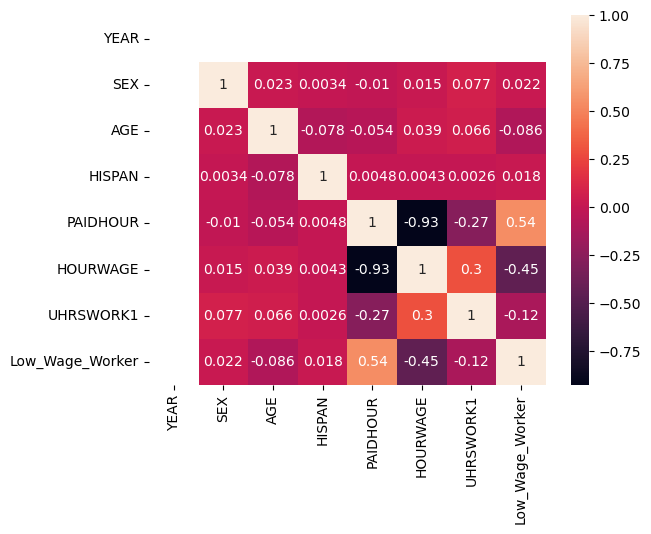

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(df.corr(),annot=True)
plt.show()


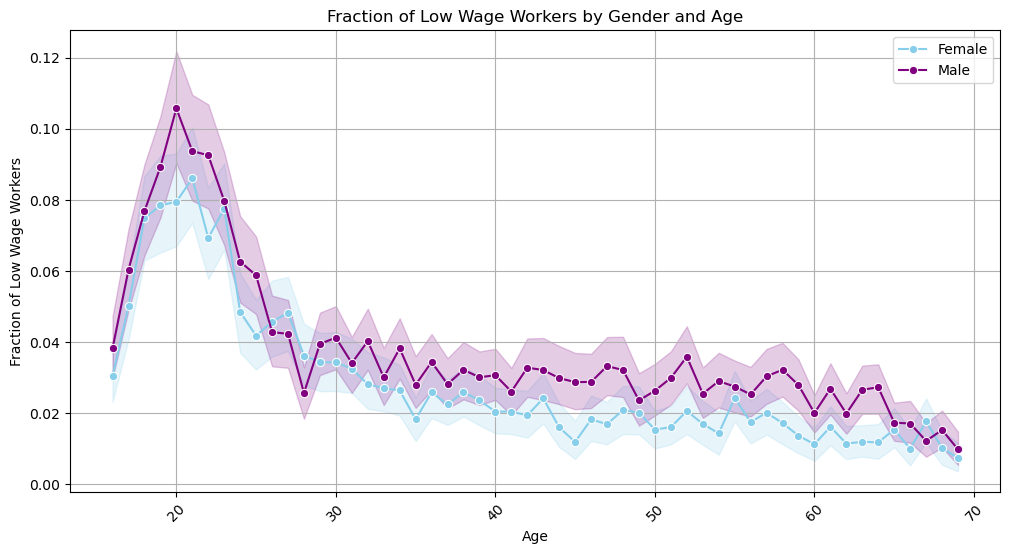

In [3]:
def fraction_of_gender_low_wage_workers_in_labor_force(df):
    plt.figure(figsize=(12,6))

    female_df = df[df['SEX'] == 0]
    male_df = df[df['SEX'] == 1]

    sns.lineplot(data=female_df, x='AGE', y='Low_Wage_Worker', color='skyblue', marker='o', label='Female')
    sns.lineplot(data=male_df, x='AGE', y='Low_Wage_Worker', color='purple', marker='o', label='Male')

    plt.xlabel('Age')
    plt.ylabel('Fraction of Low Wage Workers')
    plt.title('Fraction of Low Wage Workers by Gender and Age')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

fraction_of_gender_low_wage_workers_in_labor_force(df)


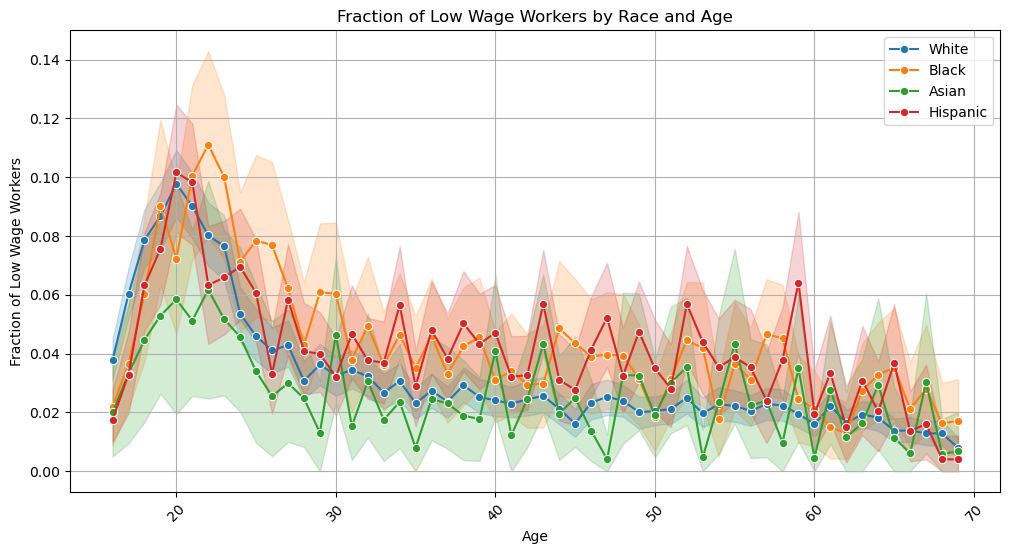

In [4]:
def fraction_of_race_low_wage_workers_in_labor_force(df):
    plt.figure(figsize=(12,6))

    white_df = df[df['RACE'] == 'white']
    black_df = df[df['RACE'] == 'Black']
    asian_df = df[df['RACE'] == 'Asian']
    hispanic_df = df[df['HISPAN'] > 0]

    sns.lineplot(data=white_df,x='AGE',y='Low_Wage_Worker',marker='o', label='White')
    sns.lineplot(data=black_df,x='AGE', y='Low_Wage_Worker',marker='o', label='Black')
    sns.lineplot(data=asian_df,x='AGE', y='Low_Wage_Worker',marker='o',label='Asian')
    sns.lineplot(data=hispanic_df,x='AGE',y='Low_Wage_Worker',marker='o', label='Hispanic')
    
    plt.xlabel('Age')
    plt.ylabel('Fraction of Low Wage Workers')
    plt.title('Fraction of Low Wage Workers by Race and Age')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

fraction_of_race_low_wage_workers_in_labor_force(df)

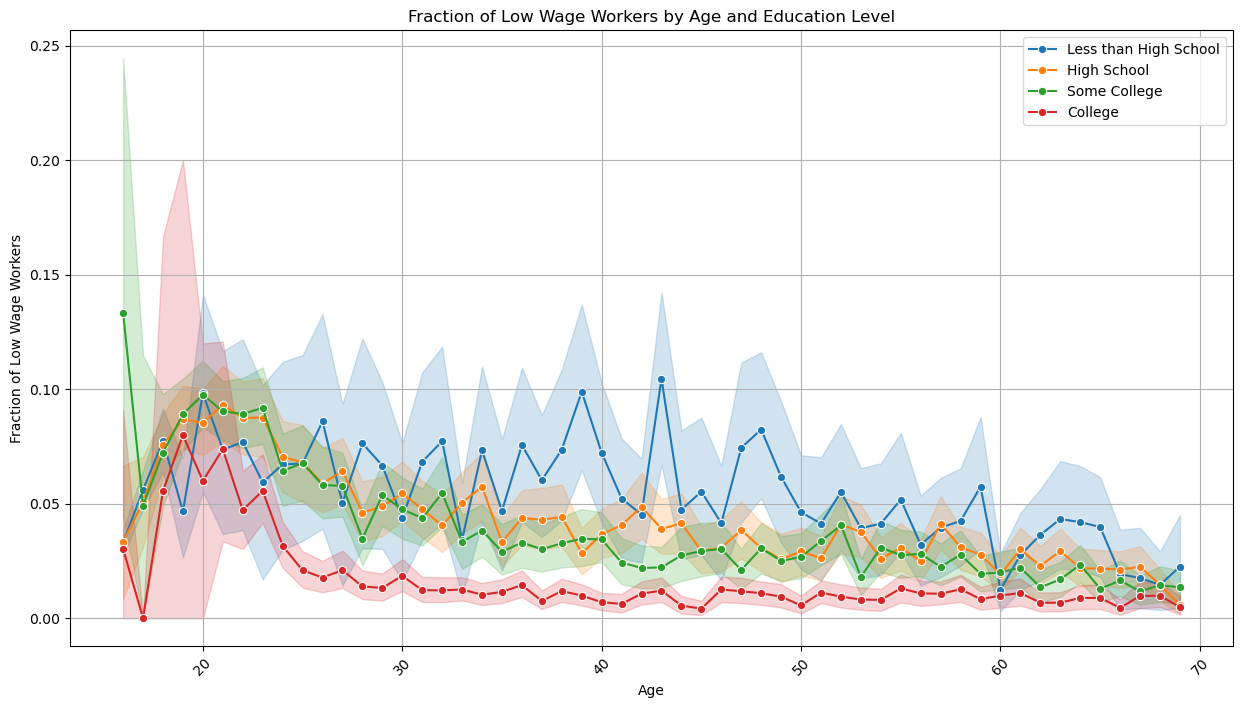

In [5]:
def fraction_of_education_low_wage_workers_in_labor_force(df):
    plt.figure(figsize=(15,8))
    
    df_less_than_high_school = df[df['EDUC'] == 'Less than High School']
    df_high_school = df[df['EDUC'] == 'High School']
    df_some_college = df[df['EDUC'] == 'Some College']
    df_college = df[df['EDUC'] == 'College']
    
    sns.lineplot(data=df_less_than_high_school, x='AGE', y='Low_Wage_Worker', marker='o', label='Less than High School')
    sns.lineplot(data=df_high_school, x='AGE', y='Low_Wage_Worker', marker='o', label='High School')
    sns.lineplot(data=df_some_college, x='AGE', y='Low_Wage_Worker', marker='o', label='Some College')
    sns.lineplot(data=df_college, x='AGE', y='Low_Wage_Worker', marker='o', label='College')
    
    plt.xlabel('Age')
    plt.ylabel('Fraction of Low Wage Workers')
    plt.title('Fraction of Low Wage Workers by Age and Education Level')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


fraction_of_education_low_wage_workers_in_labor_force(df)

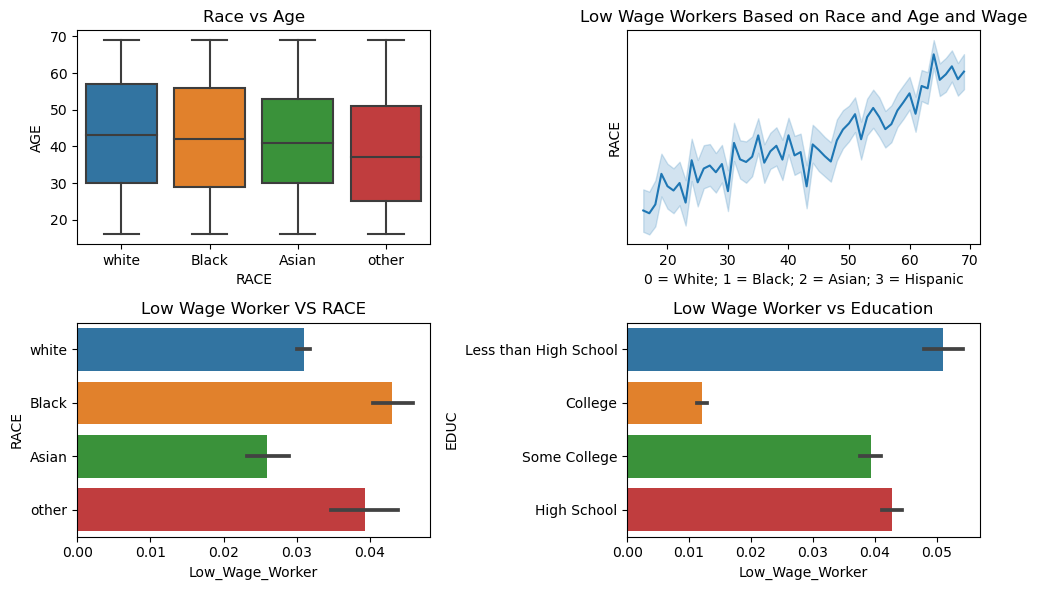

In [6]:
def subplots(df):
    _,axs = plt.subplots(2,2,figsize=(10,6))
    sns.boxplot(x='RACE',y='AGE',ax=axs[0,0],data=df)
    axs[0,0].set_title('Race vs Age')
    
    sns.lineplot(x='AGE',y='RACE',ax=axs[0,1],data=df)
    axs[0,1].set_title('Low Wage Workers Based on Race and Age and Wage')
    axs[0,1].set_xlabel('0 = White; 1 = Black; 2 = Asian; 3 = Hispanic')
    
    
    sns.barplot(x='Low_Wage_Worker',y='RACE',ax=axs[1,0],data=df)
    axs[1,0].set_title('Low Wage Worker VS RACE')
    
    
    
    sns.barplot(x='Low_Wage_Worker',y='EDUC',ax=axs[1,1],data=df)
    axs[1,1].set_title('Low Wage Worker vs Education')
    
    plt.tight_layout()
    plt.show()




subplots(df)


In [7]:
teenagers_male_df = df[(df['AGE'] >= 16) & (df['AGE'] <= 19) & (df['SEX'] == 1)]
total_teenagers_male = len(teenagers_male_df)
low_wage_teenagers_male = teenagers_male_df[teenagers_male_df['Low_Wage_Worker'] == 1]
fraction_low_wage_teenagers_male = len(low_wage_teenagers_male) / total_teenagers_male


teenagers_female_df = df[(df['AGE'] >= 16) & (df['AGE'] <= 19) & (df['SEX'] == 0)]
total_teenagers_female = len(teenagers_female_df)
low_wage_teenagers_female = teenagers_female_df[teenagers_female_df['Low_Wage_Worker'] == 1]
fraction_low_wage_teenagers_female = len(low_wage_teenagers_female) / total_teenagers_female


mid_20s_male_df = df[(df['AGE'] >= 20) & (df['AGE'] <= 29) & (df['SEX'] == 1)]
total_mid_20s_male = len(mid_20s_male_df)
low_wage_mid_20s_male = mid_20s_male_df[mid_20s_male_df['Low_Wage_Worker'] == 1]
fraction_low_wage_mid_20s_male = len(low_wage_mid_20s_male) / total_mid_20s_male


mid_20s_female_df = df[(df['AGE'] >= 20) & (df['AGE'] <= 29) & (df['SEX'] == 0)]
total_mid_20s_female = len(mid_20s_female_df)
low_wage_mid_20s_female = mid_20s_female_df[mid_20s_female_df['Low_Wage_Worker'] == 1]
fraction_low_wage_mid_20s_female = len(low_wage_mid_20s_female) / total_mid_20s_female


mid_30s_male_df = df[(df['AGE'] >= 30) & (df['AGE'] <= 39) & (df['SEX'] == 1)]
total_mid_30s_male = len(mid_30s_male_df)
low_wage_mid_30s_male = mid_30s_male_df[mid_30s_male_df['Low_Wage_Worker'] == 1]
fraction_low_wage_mid_30s_male = len(low_wage_mid_30s_male) / total_mid_30s_male


mid_30s_female_df = df[(df['AGE'] >= 30) & (df['AGE'] <= 39) & (df['SEX'] == 0)]
total_mid_30s_female = len(mid_30s_female_df)
low_wage_mid_30s_female = mid_30s_female_df[mid_30s_female_df['Low_Wage_Worker'] == 1]
fraction_low_wage_mid_30s_female = len(low_wage_mid_30s_female) / total_mid_30s_female

In [8]:
comparison_df = pd.DataFrame({
    "Age_Group": ["Teenagers", "Teenagers", "Mid-20s", "Mid-20s", "Mid-30s", "Mid-30s"],
    "Sex": ["Male", "Female", "Male", "Female", "Male", "Female"],
    "Total_Workers": [total_teenagers_male, total_teenagers_female, 
                      total_mid_20s_male, total_mid_20s_female, 
                      total_mid_30s_male, total_mid_30s_female],
    "Low_Wage_Workers": [len(low_wage_teenagers_male), len(low_wage_teenagers_female),
                          len(low_wage_mid_20s_male), len(low_wage_mid_20s_female),
                          len(low_wage_mid_30s_male), len(low_wage_mid_30s_female)],
    "Fraction_Low_Wage": [fraction_low_wage_teenagers_male, fraction_low_wage_teenagers_female,
                          fraction_low_wage_mid_20s_male, fraction_low_wage_mid_20s_female,
                          fraction_low_wage_mid_30s_male, fraction_low_wage_mid_30s_female]
})

print('Age groups compared',comparison_df)
print('average of all data across age groups',comparison_df.mean())
print('total number of femals in their mid 20s in the labor force',total_mid_20s_female)
print('total amount of teenagers in the labor force',total_teenagers_female)
print('workers in their 20s',total_mid_20s_male)

Age groups compared    Age_Group     Sex  Total_Workers  Low_Wage_Workers  Fraction_Low_Wage
0  Teenagers    Male           6746               441           0.065372
1  Teenagers  Female           7194               411           0.057131
2    Mid-20s    Male          16233              1019           0.062773
3    Mid-20s  Female          16550               936           0.056556
4    Mid-30s    Male          19436               653           0.033597
5    Mid-30s  Female          18604               493           0.026500
average of all data across age groups Total_Workers        14127.166667
Low_Wage_Workers       658.833333
Fraction_Low_Wage        0.050322
dtype: float64
total number of femals in their mid 20s in the labor force 16550
total amount of teenagers in the labor force 7194
workers in their 20s 16233


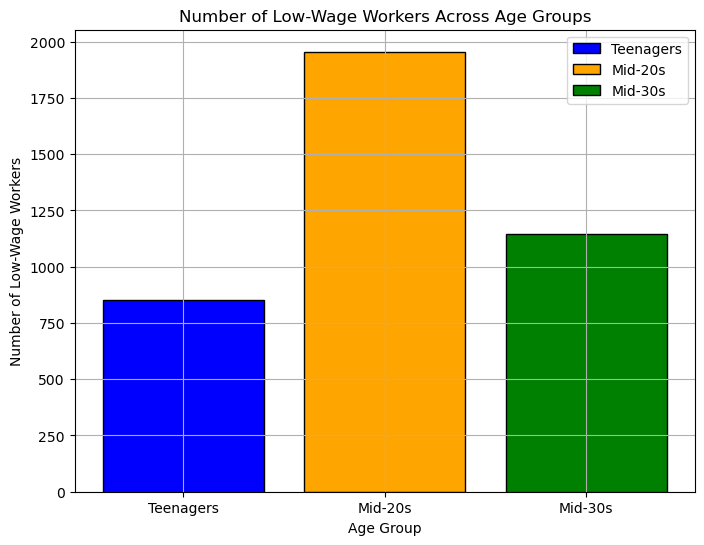

In [9]:
def low_wage_workers_by_age(df, age_groups):

    colors = ['blue', 'orange', 'green']
    

    plt.figure(figsize=(8,6))


    for i, age_group in enumerate(age_groups):
        age_group_df = df[(df['AGE'] >= age_group[0]) & (df['AGE'] <= age_group[1])]
        

        num_low_wage_workers = age_group_df['Low_Wage_Worker'].sum()
        

        plt.bar(age_group[2], num_low_wage_workers, color=colors[i], label=f'{age_group[2]}', edgecolor='black')


    plt.xlabel('Age Group')
    plt.ylabel('Number of Low-Wage Workers')
    plt.title('Number of Low-Wage Workers Across Age Groups')
    

    plt.legend()
    plt.grid(True)
    

    plt.show()


age_groups = [(16, 19, 'Teenagers'), (20, 29, 'Mid-20s'), (30, 39, 'Mid-30s')]
low_wage_workers_by_age(df, age_groups)

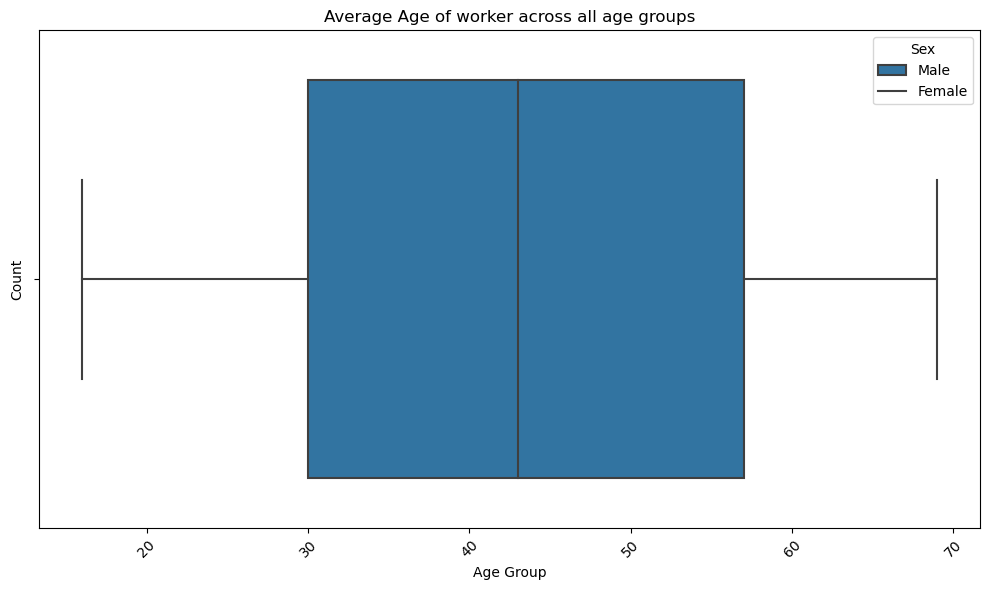

In [10]:
def sex_boxplot_by_age(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='AGE', hue='SEX', data=df)
    plt.title('Average Age of worker across all age groups')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title='Sex', labels=['Male', 'Female'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


sex_boxplot_by_age(df)

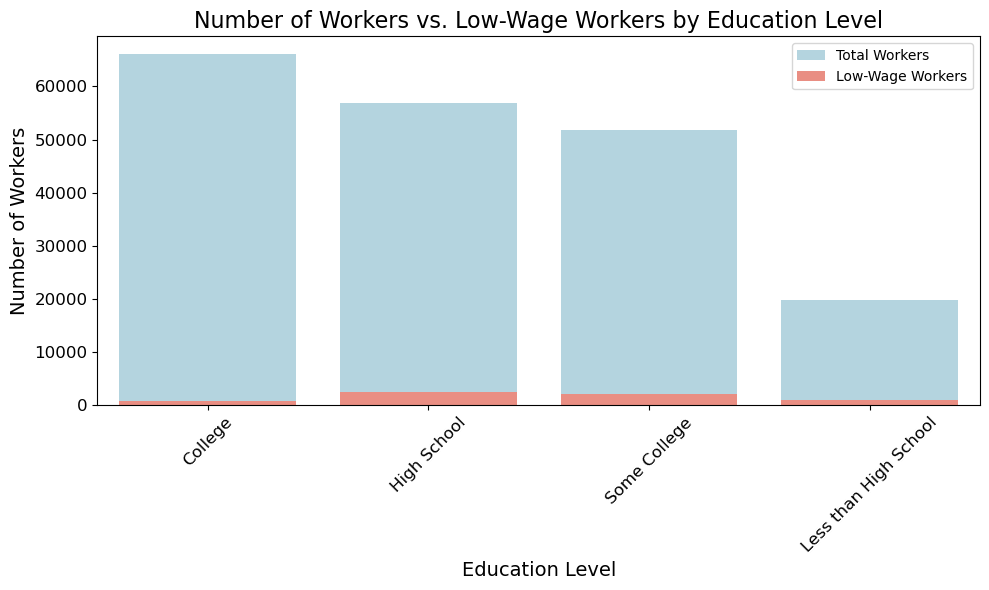

         Education Level  Total Workers  Low-Wage Workers
0                College          66116               799
1            High School          56854              2436
3           Some College          51726              2039
2  Less than High School          19866              1015


In [11]:
def low_wage_workers_by_education(df):
    
    education_counts = df.groupby('EDUC')['Low_Wage_Worker'].agg(['count', 'sum']).reset_index()
    education_counts.columns = ['Education Level', 'Total Workers', 'Low-Wage Workers']

    
    education_counts = education_counts.sort_values(by='Total Workers', ascending=False)

    
    plt.figure(figsize=(10,6))
    sns.barplot(x='Education Level', y='Total Workers', data=education_counts, color='lightblue', label='Total Workers')
    sns.barplot(x='Education Level', y='Low-Wage Workers', data=education_counts, color='salmon', label='Low-Wage Workers')
    plt.xlabel('Education Level', fontsize=14)
    plt.ylabel('Number of Workers', fontsize=14)
    plt.title('Number of Workers vs. Low-Wage Workers by Education Level', fontsize=16)
    plt.legend()
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

    
    print(education_counts)


low_wage_workers_by_education(df)


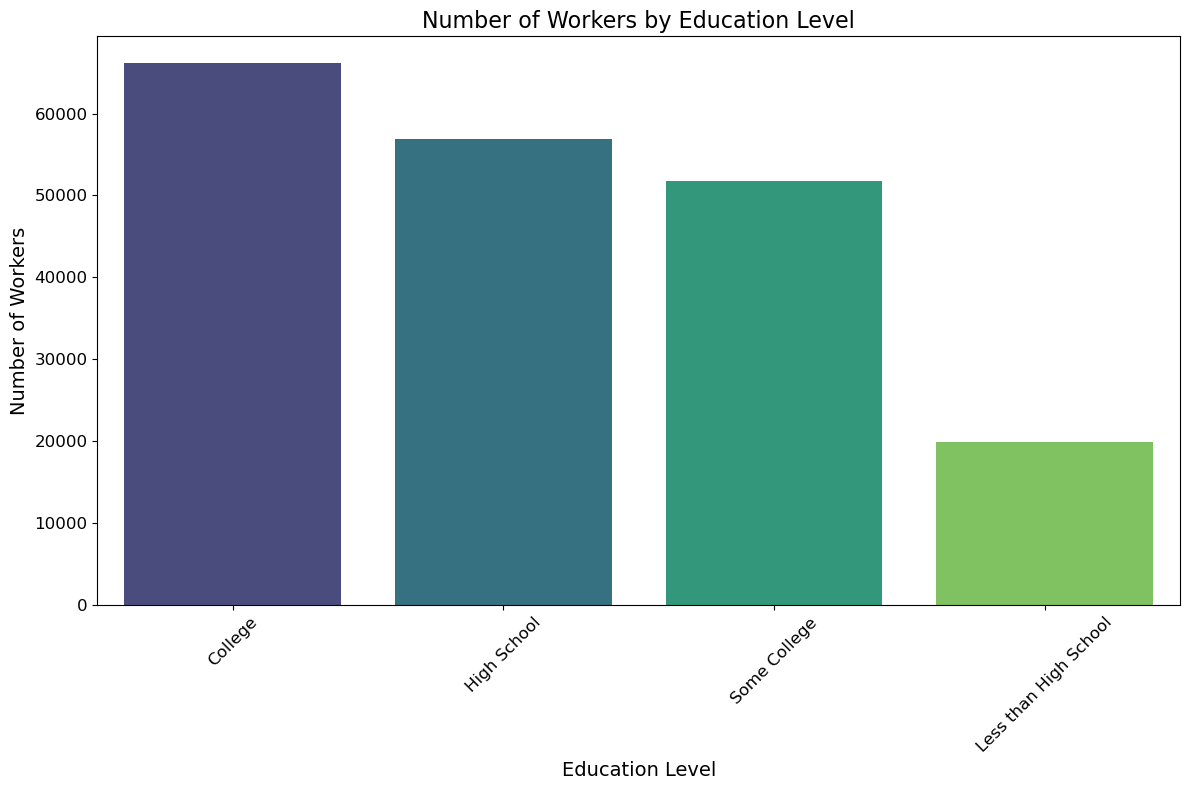

         Education Level  Total Workers
0                College          66116
1            High School          56854
3           Some College          51726
2  Less than High School          19866


In [12]:
def workers_15(df):

    education_counts = df.groupby('EDUC')['Low_Wage_Worker'].count().reset_index()
    education_counts.columns = ['Education Level', 'Total Workers']


    education_counts = education_counts.sort_values(by='Total Workers', ascending=False)


    plt.figure(figsize=(12, 8))
    sns.barplot(x='Education Level', y='Total Workers', data=education_counts, palette='viridis')
    plt.xlabel('Education Level', fontsize=14)
    plt.ylabel('Number of Workers', fontsize=14)
    plt.title('Number of Workers by Education Level', fontsize=16)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


    print(education_counts)
workers_15(df)

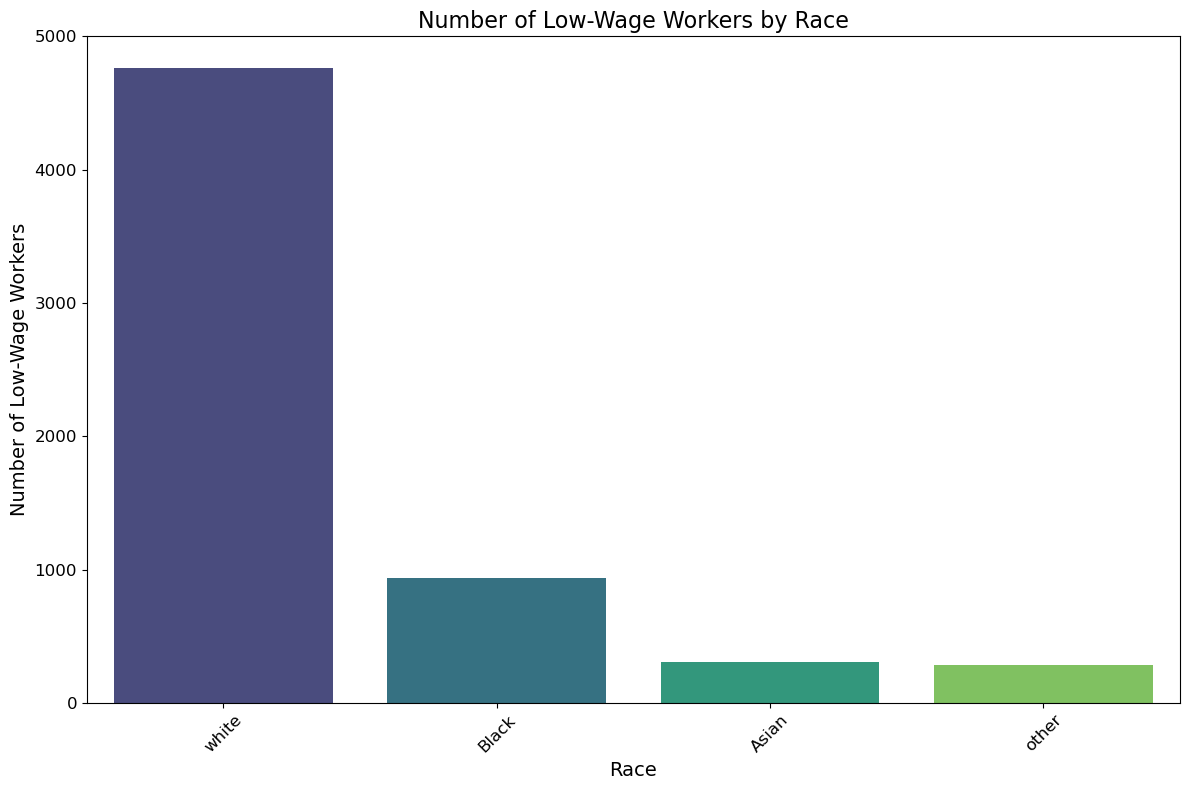

    Race  Low-Wage Workers
3  white              4763
1  Black               933
0  Asian               307
2  other               286


In [13]:
def low_wage_workers_by_race(df):
    race_counts = df.groupby('RACE')['Low_Wage_Worker'].sum().reset_index()
    race_counts.columns = ['Race', 'Low-Wage Workers']

    race_counts = race_counts.sort_values(by='Low-Wage Workers', ascending=False)

    plt.figure(figsize=(12,8))
    sns.barplot(x='Race', y='Low-Wage Workers', data=race_counts, palette='viridis')
    plt.xlabel('Race', fontsize=14)
    plt.ylabel('Number of Low-Wage Workers', fontsize=14)
    plt.title('Number of Low-Wage Workers by Race', fontsize=16)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

    print(race_counts)

low_wage_workers_by_race(df)

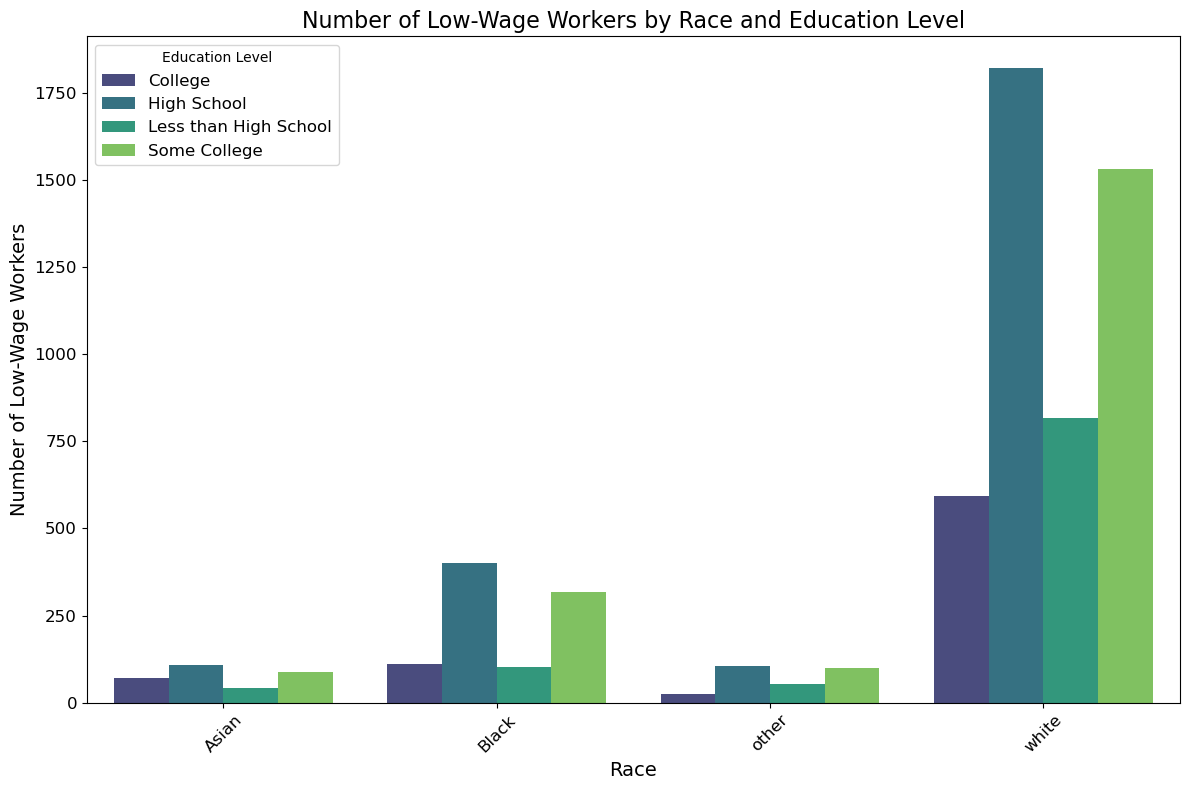

     Race        Education Level  Low-Wage Workers
0   Asian                College                70
1   Asian            High School               108
2   Asian  Less than High School                41
3   Asian           Some College                88
4   Black                College               111
5   Black            High School               401
6   Black  Less than High School               102
7   Black           Some College               319
8   other                College                26
9   other            High School               106
10  other  Less than High School                54
11  other           Some College               100
12  white                College               592
13  white            High School              1821
14  white  Less than High School               818
15  white           Some College              1532


In [14]:
def low_wage_workers_by_race_and_education(df):
    race_education_counts = df.groupby(['RACE', 'EDUC'])['Low_Wage_Worker'].sum().reset_index()
    race_education_counts.columns = ['Race', 'Education Level', 'Low-Wage Workers']

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Race', y='Low-Wage Workers', hue='Education Level', data=race_education_counts, palette='viridis')
    plt.xlabel('Race', fontsize=14)
    plt.ylabel('Number of Low-Wage Workers', fontsize=14)
    plt.title('Number of Low-Wage Workers by Race and Education Level', fontsize=16)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(title='Education Level', fontsize=12)
    plt.tight_layout()
    plt.show()

    print(race_education_counts)

low_wage_workers_by_race_and_education(df)


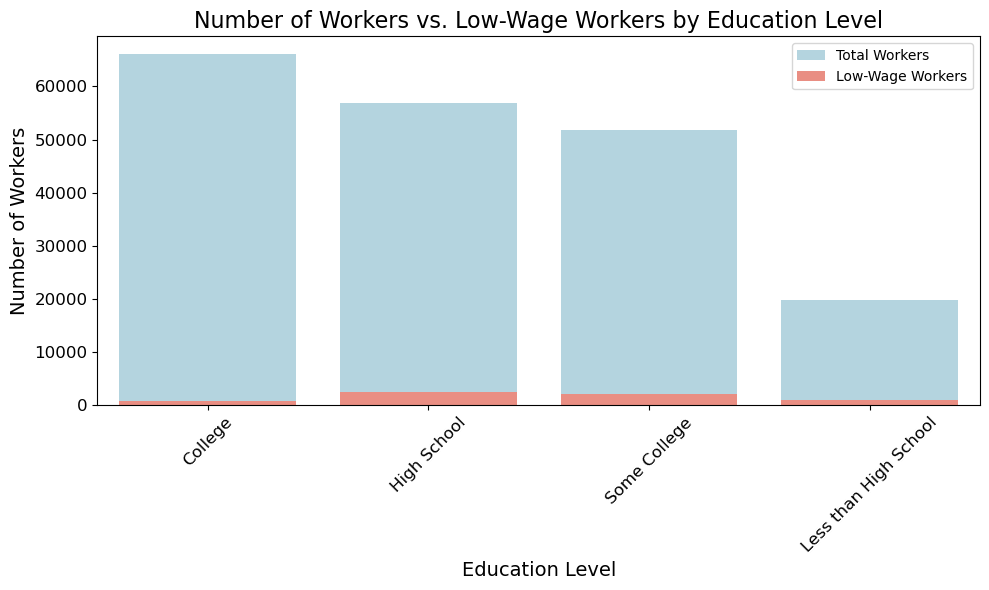

         Education Level  Total Workers  Low-Wage Workers
0                College          66116               799
1            High School          56854              2436
3           Some College          51726              2039
2  Less than High School          19866              1015
The race most impacted by a minimum wage increase to $15 is: white
                            OLS Regression Results                            
Dep. Variable:                   YEAR   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                -1.946e+05
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               1.00
Time:                        15:05:12   Log-Likelihood:             4.1961e+06
No. Observations:              194562   AIC:                        -8.392e+06
Df Residuals:                  194560   BIC:                        -8.392e+06
Df Model:  

In [15]:
def minimum_wage_increase(df):

    max_low_wage_race = df.groupby('RACE')['Low_Wage_Worker'].sum().idxmax()


    print(f"The race most impacted by a minimum wage increase to $15 is: {max_low_wage_race}")




low_wage_workers_by_education(df)
minimum_wage_increase(df)


import statsmodels.api as sm
model_race = sm.OLS(exog=sm.add_constant(df['Low_Wage_Worker']),endog=df['YEAR']).fit()
print(model_race.summary())


In [16]:
X_Low_Wage_Worker = df.drop('Low_Wage_Worker',axis=1)
y_Low_Wage_Worker = df['Low_Wage_Worker']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_Low_Wage_Worker,y_Low_Wage_Worker,test_size=.20,random_state=42)






from sklearn.preprocessing import OneHotEncoder,StandardScaler

ohe = OneHotEncoder()
sc = StandardScaler()

from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (ohe,X_Low_Wage_Worker.select_dtypes(include='object').columns),
    (sc,X_Low_Wage_Worker.select_dtypes(include=['int64','float64']).columns),remainder='passthrough')


ct.fit_transform(X_Low_Wage_Worker)




from sklearn.pipeline import make_pipeline



from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier

rfc = RandomForestClassifier()
GBC = GradientBoostingClassifier()
BC = BaggingClassifier()





from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [17]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,confusion_matrix

def evalu(X_train,X_test,y_train,y_test,model):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test,pred)
    roc = roc_auc_score(y_test,pred_prob)
    con = confusion_matrix(y_test,pred)
    print('confusion matrix',con)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%;')
    return pred,pred_prob





lr_pred,lr_pred_prob = evalu(X_train, X_test, y_train, y_test, lr)
tree_pred,tree_pred_prob = evalu(X_train, X_test, y_train, y_test, tree)
GBC_pred,GBC_pred_prob = evalu(X_train, X_test, y_train, y_test, GBC)
rfc_pred,rfc_pred_prob = evalu(X_train, X_test, y_train, y_test, rfc)
BC_pred,BC_pred_prob = evalu(X_train, X_test, y_train, y_test,BC)



nb_pipe = make_pipeline(ct,NB).fit(X_train,y_train)
nb_pred = nb_pipe.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f'The Accuracy Score of the Naive Bayes(Gaugsian) model: {nb_accuracy*100:.2f}%')

confusion matrix [[37492   174]
 [  277   970]]
LogisticRegression, --ACC-- 98.84%; --ROC-- 99.66%;
confusion matrix [[37666     0]
 [    0  1247]]
DecisionTreeClassifier, --ACC-- 100.00%; --ROC-- 100.00%;
confusion matrix [[37666     0]
 [    0  1247]]
GradientBoostingClassifier, --ACC-- 100.00%; --ROC-- 100.00%;
confusion matrix [[37666     0]
 [    0  1247]]
RandomForestClassifier, --ACC-- 100.00%; --ROC-- 100.00%;
confusion matrix [[37666     0]
 [    0  1247]]
BaggingClassifier, --ACC-- 100.00%; --ROC-- 100.00%;
The Accuracy Score of the Naive Bayes(Gaugsian) model: 96.86%


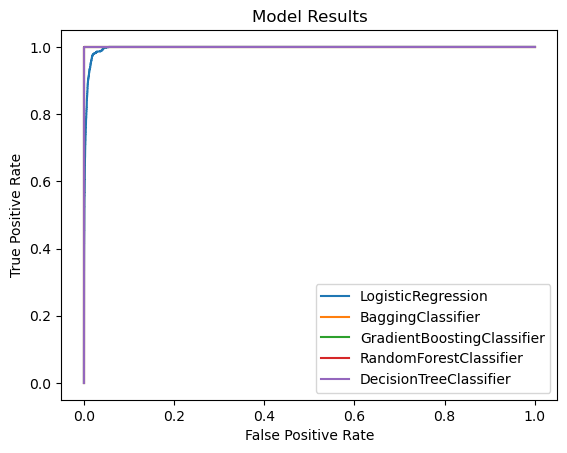

In [18]:
def ROC(y_test,y_pred_prob,model):
    fpr,tpr, _ = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr,label=model.__class__.__name__)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model Results')
    
    
    
ROC(y_test,lr_pred_prob,lr)
ROC(y_test,BC_pred_prob,BC)
ROC(y_test,GBC_pred_prob,GBC)
ROC(y_test,rfc_pred_prob,rfc)
ROC(y_test,tree_pred_prob,tree)
plt.legend()
plt.show()
